In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings("ignore")

In [828]:
df_cubic=pd.read_csv('cubic_zirconia.csv')

In [829]:
df_cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [830]:
print('The dataset has {} rows and {} columns.'.format(df_cubic.shape[0],df_cubic.shape[1]))
print('\n')

The dataset has 26967 rows and 11 columns.




In [831]:
df=df_cubic.drop('Unnamed: 0',axis=1)

In [832]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [833]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [834]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [835]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [836]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [837]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [838]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [839]:
df.duplicated().sum()

34

In [840]:
df.drop_duplicates(inplace=True)

In [841]:
df.duplicated().sum()

0

In [842]:
df.shape

(26933, 10)

In [843]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0




Skewness of carat: 1.11
Kurtosis of carat: 1.21
Outliers of carat: 6.57


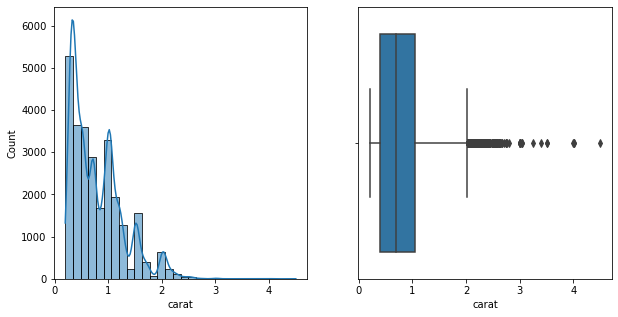

In [844]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['carat'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='carat', data=df, ax=axes[1])
print('\n')
skew=df['carat'].skew()
print('Skewness of carat: %.2f' % skew)
kurtosis=df['carat'].kurtosis()
print('Kurtosis of carat: %.2f' % kurtosis)
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['carat'] < (Q1 - 1.5 * IQR)) | (df['carat']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of carat: {}'.format(outlier/100))



Skewness of depth: -0.03
Kurtosis of depth: 3.68
Outliers of depth: 12.19


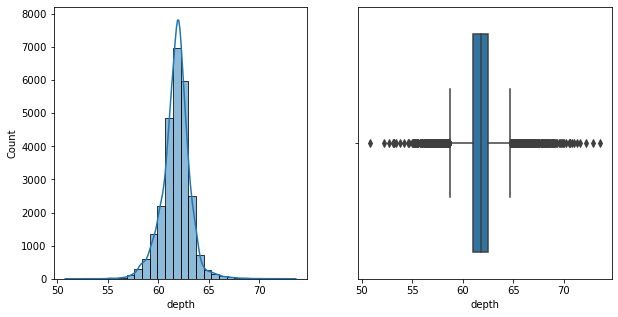

In [845]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['depth'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='depth', data=df, ax=axes[1])
print('\n')
skew=df['depth'].skew()
print('Skewness of depth: %.2f' % skew)
kurtosis=df['depth'].kurtosis()
print('Kurtosis of depth: %.2f' % kurtosis)
Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['depth'] < (Q1 - 1.5 * IQR)) | (df['depth']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of depth: {}'.format(outlier/100))



Skewness of table: 0.77
Kurtosis of table: 1.58
Outliers of table: 3.18


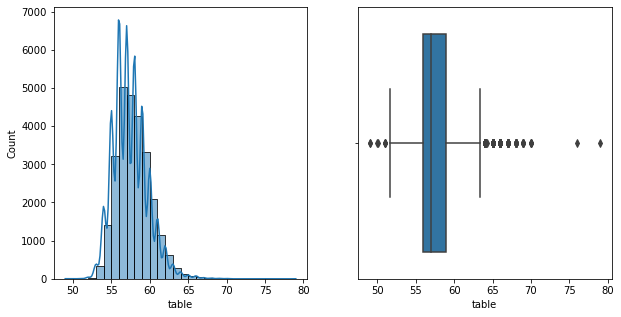

In [846]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['table'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='table', data=df, ax=axes[1])
print('\n')
skew=df['table'].skew()
print('Skewness of table: %.2f' % skew)
kurtosis=df['table'].kurtosis()
print('Kurtosis of table: %.2f' % kurtosis)
Q1 = df['table'].quantile(0.25)
Q3 = df['table'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['table'] < (Q1 - 1.5 * IQR)) | (df['table']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of table: {}'.format(outlier/100))



Skewness of x: 0.39
Kurtosis of x: -0.68
Outliers of x:0.14


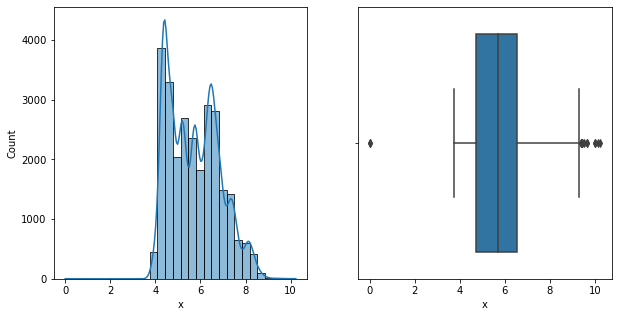

In [847]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['x'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='x', data=df, ax=axes[1])
print('\n')
skew=df['x'].skew()
print('Skewness of x: %.2f' % skew)
kurtosis=df['x'].kurtosis()
print('Kurtosis of x: %.2f' % kurtosis)
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['x'] < (Q1 - 1.5 * IQR)) | (df['x']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of x:{}'.format(outlier/100))



Skewness of y: 3.87
Kurtosis of y: 160.04
Outliers of y:0.14


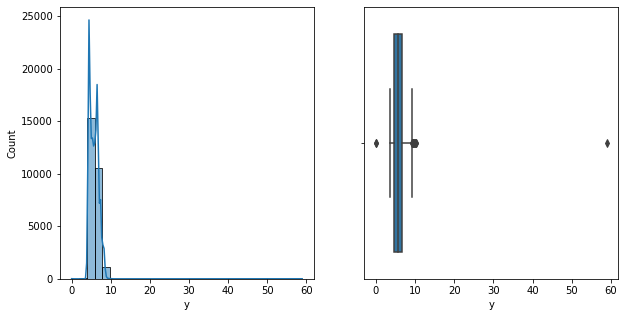

In [848]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['y'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='y', data=df, ax=axes[1])
print('\n')
skew=df['y'].skew()
print('Skewness of y: %.2f' % skew)
kurtosis=df['y'].kurtosis()
print('Kurtosis of y: %.2f' % kurtosis)
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['y'] < (Q1 - 1.5 * IQR)) | (df['y']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of y:{}'.format(outlier/100))



Skewness of z: 2.58
Kurtosis of z: 87.42
Outliers of z:0.22


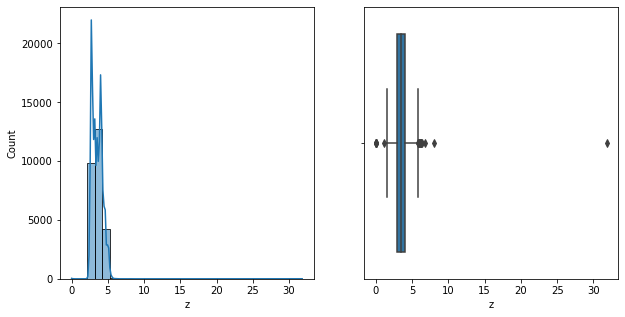

In [849]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['z'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='z', data=df, ax=axes[1])
print('\n')
skew=df['z'].skew()
print('Skewness of z: %.2f' % skew)
kurtosis=df['z'].kurtosis()
print('Kurtosis of z: %.2f' % kurtosis)
Q1 = df['z'].quantile(0.25)
Q3 = df['z'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['z'] < (Q1 - 1.5 * IQR)) | (df['z']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of z:{}'.format(outlier/100))



Skewness of price: 2.58
Kurtosis of price: 2.15
Outliers of price:17.78


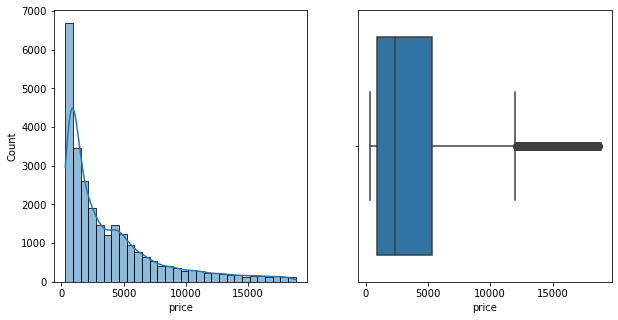

In [850]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['price'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='price', data=df, ax=axes[1])
print('\n')
skew=df['z'].skew()
print('Skewness of price: %.2f' % skew)
kurtosis=df['price'].kurtosis()
print('Kurtosis of price: %.2f' % kurtosis)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df['price'] < (Q1 - 1.5 * IQR)) | (df['price']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of price:{}'.format(outlier/100))

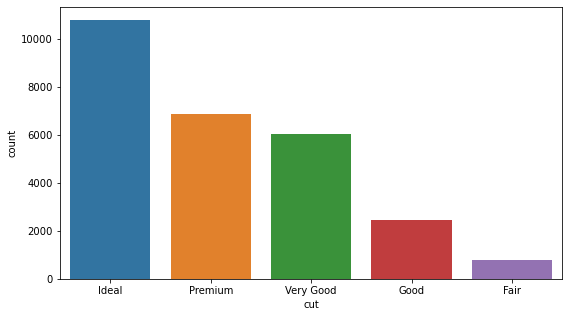

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [851]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='cut')
plt.show()
df['cut'].value_counts()

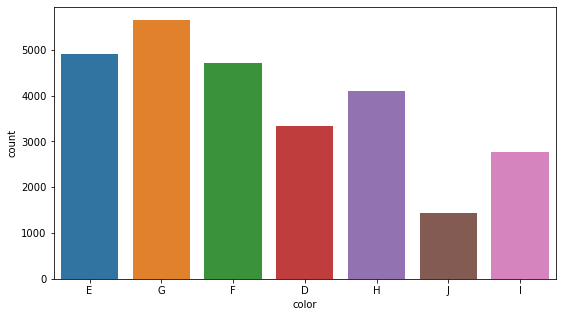

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [852]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='color')
plt.show()
df['color'].value_counts()

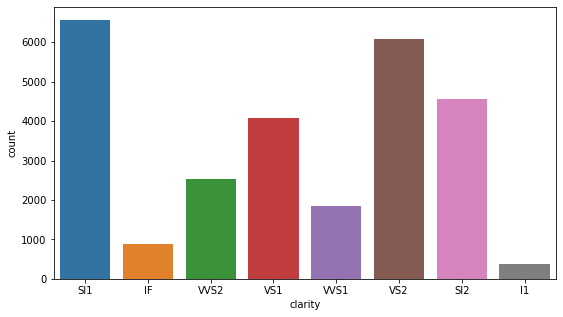

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [853]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='clarity')
plt.show()
df['clarity'].value_counts()

In [854]:
feature_list = df[['carat', 'depth', 'table', 'x', 'y', 'z']].columns
feature_list

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

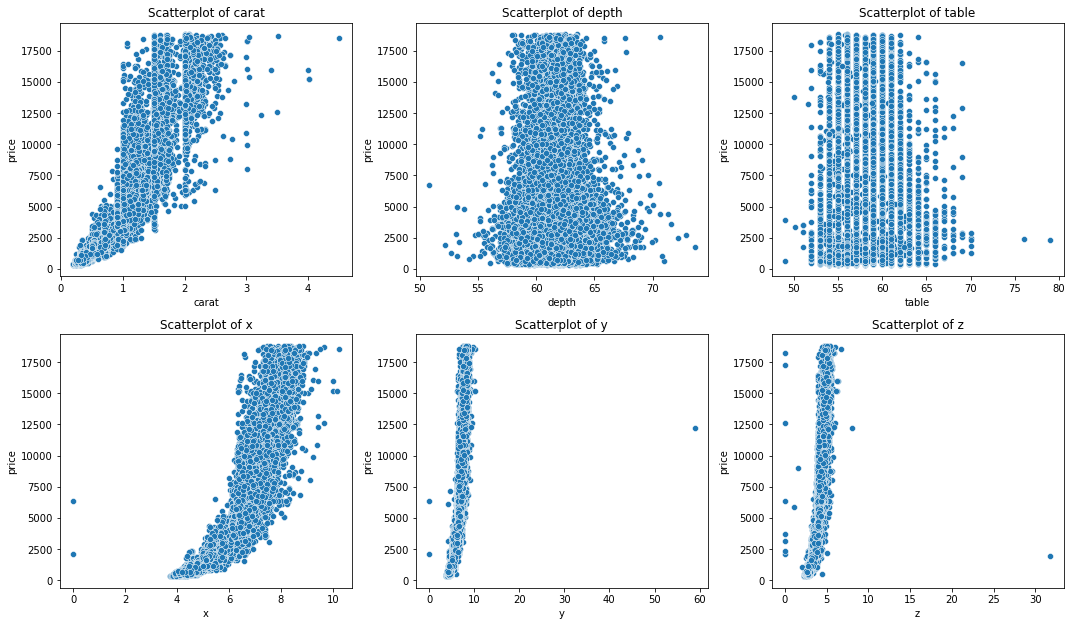

In [855]:
plt.figure(figsize=(15,30))
for i in range(len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.scatterplot(y='price',x=feature_list[i],data=df)
    plt.title('Scatterplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [856]:
feature_list = df[['cut', 'color', 'clarity']].columns
feature_list

Index(['cut', 'color', 'clarity'], dtype='object')

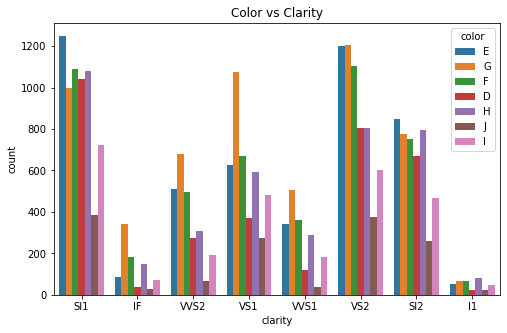

In [857]:
plt.figure(figsize=(8,5))
sns.countplot(df['clarity'],hue=df['color']);
plt.title('Color vs Clarity')
plt.show()

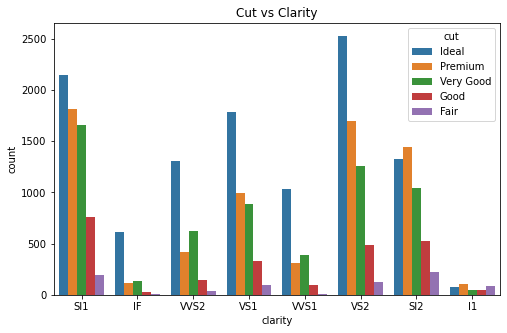

In [858]:
plt.figure(figsize=(8,5))
sns.countplot(df['clarity'],hue=df['cut']);
plt.title('Cut vs Clarity')
plt.show()

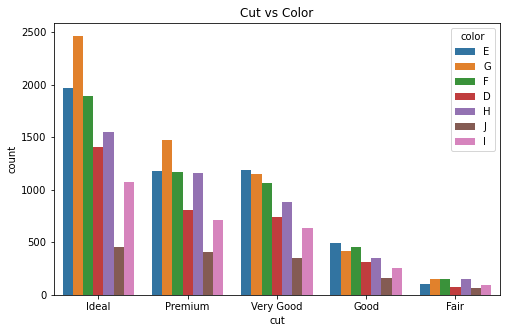

In [859]:
plt.figure(figsize=(8,5))
sns.countplot(df['cut'],hue=df['color']);
plt.title('Cut vs Color')
plt.show()

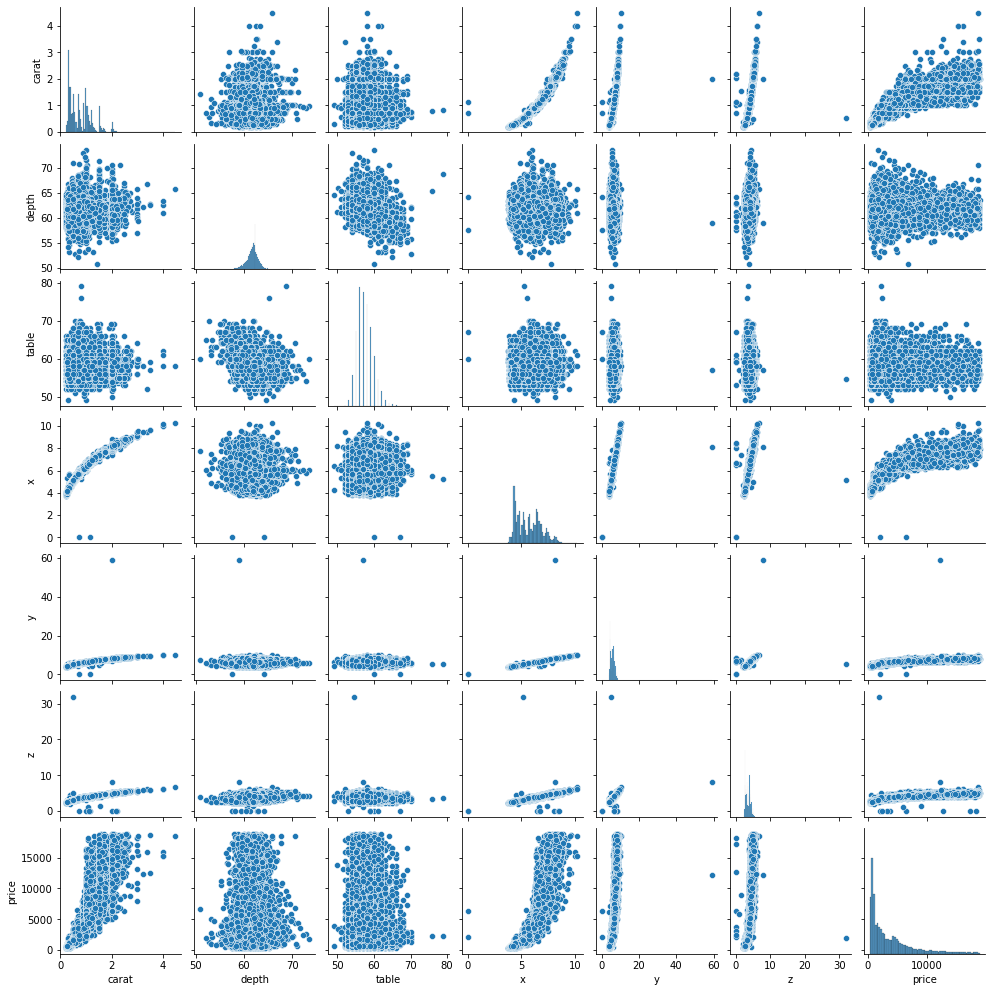

In [860]:
sns.pairplot(df,size=2)

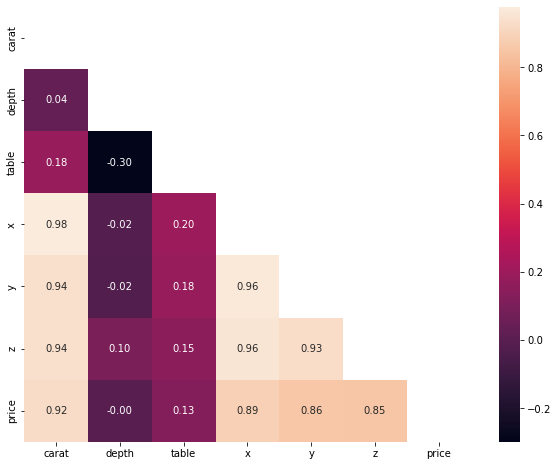

In [861]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [862]:
median=df["depth"].median()
df["depth"].replace(np.nan,median,inplace=True)

In [863]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [864]:
a=df[(df['x']<=0)|(df['y']<=0)|(df['z']<=0)]
a

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [865]:
df.drop(df[(df['x']<=0)|(df['y']<=0)|(df['z']<=0)].index,inplace=True)

In [866]:
df.shape

(26925, 10)

In [867]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    return lower_limit, upper_limit

In [868]:
feature_list = df.select_dtypes(['float64','int64']).columns
feature_list

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [869]:
for i in feature_list:
    LL,UL=remove_outlier(df[i])
    df[i]=np.where(df[i]<LL,LL,df[i])
    df[i]=np.where(df[i]>UL,UL,df[i])

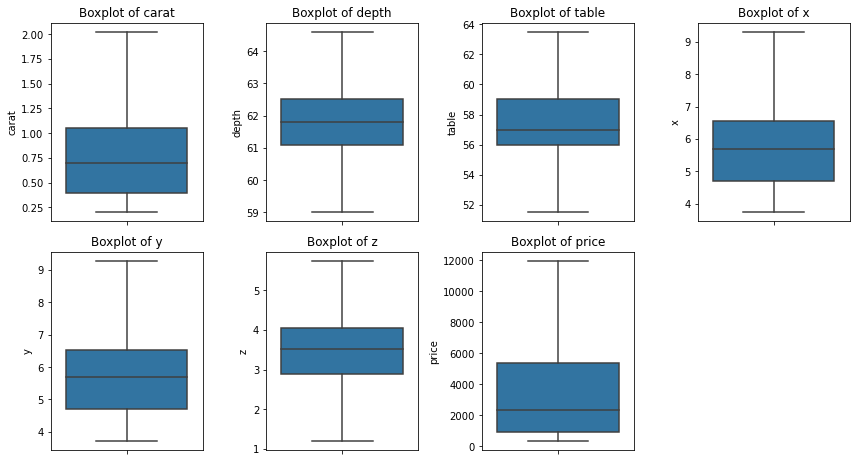

In [870]:
plt.figure(figsize=(12,16))
for i in range(len(feature_list)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[feature_list[i]],data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    

In [871]:
cut_df=df.groupby('cut')
cut_df['price'].describe().T

cut,Fair,Good,Ideal,Premium,Very Good
count,779.000000,2434.000000,10805.000000,6880.000000,6027.000000
mean,4364.383825,3770.679540,3282.618788,4276.784593,3829.352912
std,3193.788413,3149.222492,3353.661103,3679.608382,3461.492179
min,369.000000,335.000000,326.000000,326.000000,336.000000
25%,2117.000000,1157.000000,872.000000,1037.500000,910.000000
50%,3337.000000,3092.500000,1762.000000,3108.000000,2633.000000
75%,5407.500000,5112.250000,4668.000000,6257.250000,5438.000000
max,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000


In [872]:
cut_df=df.groupby('color')
cut_df['price'].describe().T

color,D,E,F,G,H,I,J
count,3341.000000,4916.000000,4722.000000,5650.000000,4091.000000,2765.000000,1440.000000
mean,3067.771027,2956.374288,3537.406184,3810.162301,4215.174529,4730.496926,5008.376389
std,3022.221311,2993.071116,3326.115989,3534.772080,3596.514528,3881.685718,3812.362655
min,357.000000,326.000000,357.000000,361.000000,337.000000,336.000000,335.000000
25%,910.000000,882.000000,947.250000,931.250000,990.000000,1145.000000,1843.000000
50%,1799.000000,1698.000000,2282.000000,2273.500000,3394.000000,3733.000000,4234.500000
75%,4265.000000,3892.750000,4862.000000,6096.750000,5949.500000,7292.000000,7592.000000
max,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000


In [873]:
cut_df=df.groupby('clarity')
cut_df['price'].describe().T

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,362.000000,891.000000,6564.000000,4561.000000,4086.000000,6092.000000,1839.000000,2530.000000
mean,3850.662983,2592.427609,3812.165143,4738.905722,3652.068527,3746.075837,2424.065797,3165.168379
std,2542.831763,3252.252509,3292.539153,3448.488611,3542.705105,3537.589627,3063.527052,3547.754089
min,345.000000,369.000000,326.000000,326.000000,338.000000,357.000000,336.000000,336.000000
25%,2071.000000,891.000000,1090.000000,2273.000000,877.000000,876.000000,814.000000,791.750000
50%,3494.000000,1063.000000,2795.000000,4077.000000,1949.000000,2066.000000,1066.000000,1253.000000
75%,5031.000000,2291.000000,5266.000000,5828.000000,6120.250000,6069.750000,2217.500000,3583.750000
max,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000


In [874]:
df['cut']=np.where(df['cut']=='Very Good','Good', df['cut'])

In [875]:
df['clarity']=np.where(df['clarity']=='VS1','VS', df['clarity'])
df['clarity']=np.where(df['clarity']=='VS2','VS', df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS1','VVS', df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS2','VVS', df['clarity'])
df['clarity']=np.where(df['clarity']=='SI1','SI', df['clarity'])
df['clarity']=np.where(df['clarity']=='SI2','SI', df['clarity'])

In [876]:
cut_dm={'Fair':0,'Good':1,'Premium':2,'Ideal':3}
df['cut']=df.cut.map(cut_dm)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,E,SI,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,E,VVS,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,F,VS,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,F,VVS,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,2,G,SI,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,3,H,IF,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,2,E,VS,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,1,F,VVS,61.8,56.0,4.19,4.20,2.60,682.0


In [877]:
color_dm={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
df['color']=df.color.map(color_dm)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,SI,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,3,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,1,VVS,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,2,VS,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,2,VVS,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,2,3,SI,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,3,4,IF,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,2,1,VS,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,1,2,VVS,61.8,56.0,4.19,4.20,2.60,682.0


In [878]:
clarity_dm={'IF':0,'VVS':1,'VS':2,'SI':3,'I1':4}
df['clarity']=df.clarity.map(clarity_dm)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779.0
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,2,3,3,62.3,58.0,6.61,6.52,4.09,5408.0
26963,0.33,3,4,0,61.9,55.0,4.44,4.42,2.74,1114.0
26964,0.51,2,1,2,61.7,58.0,5.12,5.15,3.17,1656.0
26965,0.27,1,2,1,61.8,56.0,4.19,4.20,2.60,682.0


In [879]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779.0


In [880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


In [881]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [882]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics

In [883]:
X_1=df.drop('price',axis=1)
y_1=df[['price']]

In [884]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, y_1, test_size=0.30 , random_state=1)

In [885]:
print('X_train_1',X_train_1.shape)
print('X_test_1',X_test_1.shape)
print('Y_train_1',Y_train_1.shape)
print('Y_test_1',Y_test_1.shape)

X_train_1 (18847, 9)
X_test_1 (8078, 9)
Y_train_1 (18847, 1)
Y_test_1 (8078, 1)


In [886]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train_1, Y_train_1)

LinearRegression()

In [887]:
Y_train_1

,price
5030,4065.0
12108,5166.0
20181,1708.0
4712,2447.0
2548,6618.0
...,...
10965,1219.0
17309,10656.0
5193,6354.0
12182,1784.0


In [888]:
X_train_1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [889]:
for idx, col_name in enumerate(X_train_1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The coefficient for carat is 8876.101584466329
The coefficient for cut is 115.90214179948099
The coefficient for color is -261.96553649230464
The coefficient for clarity is -795.8798497789428
The coefficient for depth is 22.44659598777949
The coefficient for table is -21.259559425363648
The coefficient for x is -1483.1681321511865
The coefficient for y is 1655.4821489743026
The coefficient for z is -949.5464732378701


In [890]:
intercept1 = regression_model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.7524403108336342e-16


In [891]:
# R square on training data
Rsq1_train=regression_model_1.score(X_train_1, Y_train_1)
Rsq1_train

0.9272782479041014

In [892]:
# R square on testing data
Rsq1_test=regression_model_1.score(X_test_1, Y_test_1)
Rsq1_test

0.9278137643972159

In [893]:
#RMSE on Training data
predicted_train_1=regression_model_1.fit(X_train_1, Y_train_1).predict(X_train_1)
RMSE1_train=np.sqrt(metrics.mean_squared_error(Y_train_1,predicted_train_1))
RMSE1_train

932.5837368395347

In [894]:
#RMSE on Testing data
predicted_test_1=regression_model_1.fit(X_train_1, Y_train_1).predict(X_test_1)
RMSE1_test=np.sqrt(metrics.mean_squared_error(Y_test_1,predicted_test_1))

In [895]:
# Prediction on Test data
y_pred = regression_model_1.predict(X_test_1)

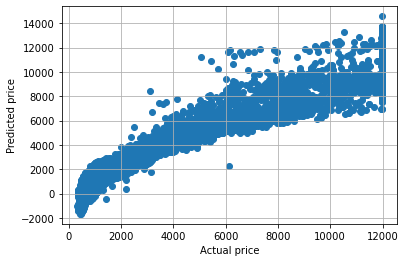

In [896]:
plt.scatter(Y_test_1['price'], y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [897]:
data_train_1 = pd.concat([X_train_1, Y_train_1], axis=1)
data_test_1 = pd.concat([X_test_1, Y_test_1], axis=1)


In [898]:
data_train_1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [899]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_1).fit()
lm1.params

Intercept    1104.998855
carat        8876.101584
cut           115.902142
color        -261.965536
clarity      -795.879850
depth          22.446596
table         -21.259559
x           -1483.168132
y            1655.482149
z            -949.546473
dtype: float64

In [900]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.669e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:14:40   Log-Likelihood:            -1.5562e+05
No. Observations:               18847   AIC:                         3.113e+05
Df Residuals:                   18837   BIC:                         3.113e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1104.9989    807.913      1.368      0.1

In [901]:
# Calculate MSE
Stats_Rsq1_train = np.mean((lm1.predict(data_train_1.drop('price',axis=1))-data_train_1['price'])**2)
Stats_Rsq1_train

869712.4262175853

In [902]:
#Root Mean Squared Error - RMSE
Stats_RMSE1_train=np.sqrt(mse_train)
Stats_RMSE1_train

932.583736839532

In [903]:
# Calculate MSE
Stats_Rsq1_test = np.mean((lm1.predict(data_test_1.drop('price',axis=1))-data_test_1['price'])**2)
Stats_Rsq1_test

876764.2667323641

In [904]:
#Root Mean Squared Error - RMSE
Stats_RMSE1_test=np.sqrt(mse_test)
Stats_RMSE1_test

936.3569120438873

In [905]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [906]:
vif1 = [variance_inflation_factor(X_1.values, ix) for ix in range(X_1.shape[1])] 

In [907]:
i=0
for column in X_1.columns:
    if i < 10:
        print (column ,"--->",  vif1[i])
        i = i+1

carat ---> 123.02514393607508
cut ---> 7.893987644069362
color ---> 3.7111273371646227
clarity ---> 9.455341183739298
depth ---> 1202.4056353291483
table ---> 892.8219985916426
x ---> 10717.06018829896
y ---> 9363.951009938526
z ---> 3239.3545435441483


In [908]:
vif1_max=1202.41
vif1_min=3.71

In [909]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [910]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1105.0) * Intercept + (8876.1) * carat + (115.9) * cut + (-261.97) * color + (-795.88) * clarity + (22.45) * depth + (-21.26) * table + (-1483.17) * x + (1655.48) * y + (-949.55) * z + 

In [911]:
X_2=df.drop({'price','x','y','z'},axis=1)
y_2=df[['price']]

In [912]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, y_2, test_size=0.30 , random_state=1)

In [913]:
print('X_train',X_train_2.shape)
print('X_test',X_test_2.shape)
print('Y_train',Y_train_2.shape)
print('Y_test',Y_test_2.shape)

X_train (18847, 6)
X_test (8078, 6)
Y_train (18847, 1)
Y_test (8078, 1)


In [914]:
regression_model_2 = LinearRegression()
regression_model_2.fit(X_train_2, Y_train_2)

LinearRegression()

In [915]:
X_train_2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [916]:
for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[0][idx]))

The coefficient for carat is 7877.03817022081
The coefficient for cut is 103.89057343274295
The coefficient for color is -260.2731684668061
The coefficient for clarity is -823.6817195374326
The coefficient for depth is -28.523685266241426
The coefficient for table is -27.237961378651267


In [917]:
intercept2 = regression_model_2.intercept_[0]

print("The intercept for our model is {}".format(intercept2))

The intercept for our model is 3101.317022281597


In [918]:
# R square on training data
Rsq2_train=regression_model_2.score(X_train_2, Y_train_2)
print("R squared for training set is {}".format(regression_model_2.score(X_train_2, Y_train_2)))
Rsq2_train

R squared for training set is 0.9260825413502574


0.9260825413502574

In [995]:
# R square on testing data
Rsq2_test=regression_model_2.score(X_test_2, Y_test_2)
Rsq2_test

0.9266320935192703

In [992]:
#RMSE on Training data
RMSE2_train=regression_model_2.fit(X_train_2, Y_train_2).predict(X_train_2)
RMSE2_train=np.sqrt(metrics.mean_squared_error(Y_train_2,RMSE2_train))
RMSE2_train

940.2193485412608

In [993]:
#RMSE on Testing data
RMSE2_test=regression_model_2.fit(X_train_2, Y_train_2).predict(X_test_2)
RMSE2_test=np.sqrt(metrics.mean_squared_error(Y_test_2,RMSE2_test))
RMSE2_test

943.9897677390762

In [922]:
# Prediction on Test data
y_pred_2 = regression_model_2.predict(X_test_2)

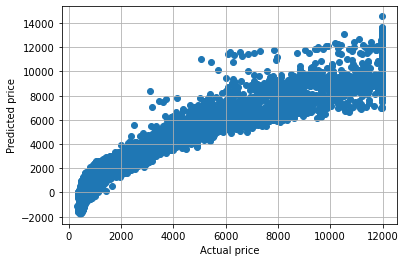

In [923]:
plt.scatter(Y_test_2['price'], y_pred_2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [924]:
data_train_2 = pd.concat([X_train_2, Y_train_2], axis=1)
data_test_2 = pd.concat([X_test_2, Y_test_2], axis=1)


In [925]:
data_train_2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [926]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table', data = data_train_2).fit()
lm2.params

Intercept    3101.317022
carat        7877.038170
cut           103.890573
color        -260.273168
clarity      -823.681720
depth         -28.523685
table         -27.237961
dtype: float64

In [927]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.934e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:14:41   Log-Likelihood:            -1.5577e+05
No. Observations:               18847   AIC:                         3.116e+05
Df Residuals:                   18840   BIC:                         3.116e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3101.3170    537.752      5.767      0.0

In [928]:
# Calculate MSE
Stats_Rsq2_train = np.mean((lm2.predict(data_train_2.drop('price',axis=1))-data_train_2['price'])**2)
Stats_Rsq2_train

884012.4233713535

In [929]:
#Root Mean Squared Error - RMSE
Stats_RMSE2_train=np.sqrt(mse_train_2)
Stats_RMSE2_train

940.2193485412612

In [930]:
# Calculate MSE
Stats_Rsq2_test = np.mean((lm2.predict(data_test_2.drop('price',axis=1))-data_test_2['price'])**2)
Stats_Rsq2_test

891116.6815960731

In [931]:
#Root Mean Squared Error - RMSE
Stats_RMSE2_test=np.sqrt(mse_test_2)
Stats_RMSE2_test

943.9897677390752

In [932]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [933]:
vif2 = [variance_inflation_factor(X_2.values, ix) for ix in range(X_2.shape[1])] 

In [934]:
i=0
for column in X_2.columns:
    if i < 10:
        print (column ,"--->",  vif2[i])
        i = i+1

carat ---> 5.005040077838448
cut ---> 6.441717890091957
color ---> 3.7032062324590154
clarity ---> 9.137888562785573
depth ---> 519.6710969933396
table ---> 491.6711896596253


In [935]:
vif2_max=519.67
vif2_min=3.70

In [936]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3101.32) * Intercept + (7877.04) * carat + (103.89) * cut + (-260.27) * color + (-823.68) * clarity + (-28.52) * depth + (-27.24) * table + 

In [937]:
X_3=df.drop({'price','depth','x','y','z'},axis=1)
y_3=df[['price']]


In [938]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, y_3, test_size=0.30 , random_state=1)

In [939]:
print('X_train',X_train_3.shape)
print('X_test',X_test_3.shape)
print('Y_train',Y_train_3.shape)
print('Y_test',Y_test_3.shape)

X_train (18847, 5)
X_test (8078, 5)
Y_train (18847, 1)
Y_test (8078, 1)


In [940]:
regression_model_3 = LinearRegression()
regression_model_3.fit(X_train_3, Y_train_3)

LinearRegression()

In [941]:
X_train_3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table'], dtype='object')

In [942]:
for idx, col_name in enumerate(X_train_3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[0][idx]))

The coefficient for carat is 7875.192000639305
The coefficient for cut is 118.18545468751158
The coefficient for color is -261.22788912393196
The coefficient for clarity is -826.5812448828494
The coefficient for table is -19.544000671766163


In [943]:
intercept3 = regression_model_3.intercept_[0]

print("The intercept for our model is {}".format(intercept4))

The intercept for our model is -1.7524403108336342e-16


In [944]:
# R square on training data
Rsq3_train=regression_model_3.score(X_train_3, Y_train_3)
Rsq3_train

0.9260028120890724

In [945]:
# R square on testing data
Rsq3_test=regression_model_3.score(X_test_3, Y_test_3)
Rsq3_test

0.9265177098296845

In [946]:
#RMSE on Training data
RMSE3_train=regression_model_3.fit(X_train_3, Y_train_3).predict(X_train_3)
RMSE3_train=np.sqrt(metrics.mean_squared_error(Y_train_3,RMSE3_train))
RMSE3_train

940.7262841964081

In [947]:
#RMSE on Testing data
RMSE3_test=regression_model_3.fit(X_train_3, Y_train_3).predict(X_test_3)
RMSE3_test=np.sqrt(metrics.mean_squared_error(Y_test_3,RMSE3_test))
RMSE3_test

944.7253412706062

In [948]:
# Prediction on Test data
y_pred_3 = regression_model_3.predict(X_test_3)

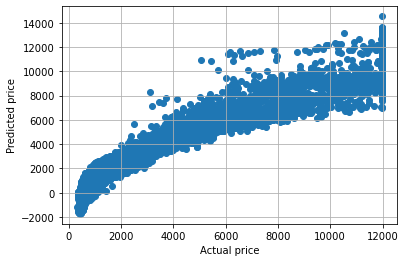

In [949]:
plt.scatter(Y_test_3['price'], y_pred_3)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [950]:
data_train_3 = pd.concat([X_train_3, Y_train_3], axis=1)
data_test_3 = pd.concat([X_test_3, Y_test_3], axis=1)


In [951]:
data_train_3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price'], dtype='object')

In [952]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula= 'price ~ carat+cut+color+clarity+table', data = data_train_3).fit()
lm3.params

Intercept     879.429949
carat        7875.192001
cut           118.185455
color        -261.227889
clarity      -826.581245
table         -19.544001
dtype: float64

In [953]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 4.716e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:14:42   Log-Likelihood:            -1.5578e+05
No. Observations:               18847   AIC:                         3.116e+05
Df Residuals:                   18841   BIC:                         3.116e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    879.4299    215.148      4.088      0.0

In [954]:
# Calculate MSE
Stats_Rsq3_train = np.mean((lm3.predict(data_train_3.drop('price',axis=1))-data_train_3['price'])**2)
Stats_Rsq3_train

884965.9417779816

In [955]:
#Root Mean Squared Error - RMSE
Stats_RMSE3_train=np.sqrt(mse_train_3)
Stats_RMSE3_train

940.7262841964083

In [956]:
# Calculate MSE
Stats_Rsq3_test = np.mean((lm3.predict(data_test_3.drop('price',axis=1))-data_test_3['price'])**2)
Stats_Rsq3_test

892505.9704388647

In [957]:
#Root Mean Squared Error - RMSE

Stats_RMSE3_test=math.sqrt(mse_test_3)
Stats_RMSE3_test

944.7253412706069

In [958]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [959]:
vif_3= [variance_inflation_factor(X_3.values, ix) for ix in range(X_3.shape[1])] 

In [960]:
i=0
for column in X_3.columns:
    if i < 10:
        print (column ,"--->",  vif_3[i])
        i = i+1

carat ---> 4.974750502463844
cut ---> 5.650928306801946
color ---> 3.6792131765899487
clarity ---> 9.088711647681652
table ---> 17.283025403617074


In [961]:
vif3_max=17.29
vif3_min=3.68

In [962]:
for i,j in np.array(lm3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(879.43) * Intercept + (7875.19) * carat + (118.19) * cut + (-261.23) * color + (-826.58) * clarity + (-19.54) * table + 

###-----------------------------------------------------------------------------------------------------------------------

In [963]:
X_4 = df.drop({'price','x','y','z'}, axis=1)
Y_4 = df[['price']]
X_4

,carat,cut,color,clarity,depth,table
0,0.30,3,1,3,62.1,58.0
1,0.33,2,3,0,60.8,58.0
2,0.90,1,1,1,62.2,60.0
3,0.42,3,2,2,61.6,56.0
4,0.31,3,2,1,60.4,59.0
...,...,...,...,...,...,...
26962,1.11,2,3,3,62.3,58.0
26963,0.33,3,4,0,61.9,55.0
26964,0.51,2,1,2,61.7,58.0
26965,0.27,1,2,1,61.8,56.0


In [964]:
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_4, Y_4, test_size=0.30 , random_state=1)

In [965]:
from scipy.stats import zscore

X_train_scaled_4  = X_train_4.apply(zscore)
X_test_scaled_4 = X_test_4.apply(zscore)
Y_train_scaled_4 = Y_train_4.apply(zscore)
Y_test_scaled_4 = Y_test_4.apply(zscore)

In [966]:
X = X_4.apply(zscore)

In [967]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_4 = LinearRegression()
regression_model_4.fit(X_train_scaled_4, Y_train_scaled_4)

LinearRegression()

In [968]:
print('X_train',X_train_scaled_4.shape)
print('X_test',X_test_scaled_4.shape)
print('Y_train',Y_train_scaled_4.shape)
print('Y_test',Y_test_scaled_4.shape)

X_train (18847, 6)
X_test (8078, 6)
Y_train (18847, 1)
Y_test (8078, 1)


In [969]:
for idx, col_name in enumerate(X_train_scaled_4.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_4.coef_[0][idx]))

The coefficient for carat is 1.0474828391594044
The coefficient for cut is 0.02737027068588608
The coefficient for color is -0.12825981522265867
The coefficient for clarity is -0.20220071390379005
The coefficient for depth is -0.010055361836416428
The coefficient for table is -0.016984655817500194


In [970]:
intercept4 = regression_model_4.intercept_[0]
intercept4

-1.7524403108336342e-16

In [971]:
# R square on training data
Rsq4_train=regression_model_4.score(X_train_scaled_4, Y_train_scaled_4)

In [972]:
# R square on testing data
Rsq4_test=regression_model_4.score(X_test_scaled_4, Y_test_scaled_4)

In [973]:
#RMSE on Training data
RMSE4_train=regression_model_4.fit(X_train_scaled_4, Y_train_scaled_4).predict(X_train_scaled_4)
RMSE4_train=np.sqrt(metrics.mean_squared_error(Y_train_scaled_4,RMSE4_train))
RMSE4_train

0.2718776538256549

In [974]:
#RMSE on Testing data
RMSE4_test=regression_model_3.fit(X_train_scaled_4, Y_train_scaled_4).predict(X_test_scaled_4)
RMSE4_test=np.sqrt(metrics.mean_squared_error(Y_test_scaled_4,RMSE4_test))
RMSE4_test

0.27090120960054836

In [975]:
# Prediction on Test data
y_pred_4 = regression_model_4.predict(X_test_scaled_4)

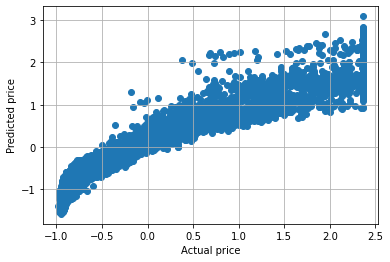

In [976]:
plt.scatter(Y_test_scaled_4['price'], y_pred_4)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [977]:
data_train_4 = pd.concat([X_train_scaled_4, Y_train_scaled_4], axis=1)
data_test_4 = pd.concat([X_test_scaled_4, Y_test_scaled_4], axis=1)
data_train_4

,carat,cut,color,clarity,depth,table,price
5030,0.668077,-1.130148,-0.942034,0.925310,1.269083,-0.660885,0.097115
12108,0.472372,-1.130148,-1.528825,0.925310,1.843266,-0.660885,0.415485
20181,-0.266960,-1.130148,1.405128,-0.252624,-0.863596,1.843240,-0.584445
4712,-0.071254,-1.130148,0.231547,0.925310,-2.258041,2.585202,-0.370752
2548,0.472372,-0.032554,0.231547,-0.252624,0.858953,0.730295,0.835351
...,...,...,...,...,...,...,...
10965,-0.571390,-1.130148,0.231547,0.925310,-0.617518,-1.124612,-0.725846
17309,1.211703,1.065039,0.231547,-0.252624,0.776926,-0.197158,2.002996
5193,0.929018,-0.032554,1.405128,-0.252624,-0.945622,1.657749,0.759012
12182,-0.506155,1.065039,-0.942034,0.925310,0.858953,0.266568,-0.562468


In [978]:
data_train_4.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [979]:
import statsmodels.formula.api as smf
lm4 = smf.ols(formula= 'price ~ carat+cut+color+table+depth+clarity',data = data_train_4).fit()
lm4.params

Intercept   -3.209238e-17
carat        1.047483e+00
cut          2.737027e-02
color       -1.282598e-01
table       -1.698466e-02
depth       -1.005536e-02
clarity     -2.022007e-01
dtype: float64

In [980]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.934e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:14:43   Log-Likelihood:                -2196.3
No. Observations:               18847   AIC:                             4407.
Df Residuals:                   18840   BIC:                             4462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.209e-17      0.002  -1.62e-14      1.0

In [981]:
#MSE Train
Stats_Rsq4_train = np.mean((lm4.predict(data_train_4.drop('price',axis=1))-data_train_4['price'])**2)
Stats_Rsq4_train

0.0739174586497431

In [982]:
#Root Mean Squared Error - RMSE Train
Stats_RMSE4_train=np.sqrt(mse_train_4)
Stats_RMSE4_train

0.27187765382565576

In [983]:
# Calculate MSE test
Stats_Rsq4_test = np.mean((lm4.predict(data_test_4.drop('price',axis=1))-data_test_4['price'])**2)
Stats_Rsq4_test

0.07338746536304028

In [984]:
#Root Mean Squared Error - RMSE test
Stats_RMSE4_test=np.sqrt(mse_test_4)
Stats_RMSE4_test

0.2709012096005484

In [985]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [986]:
vif_4= [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [987]:
i=0
for column in X.columns:
    if i < 10:
        print (column ,"--->",  vif_4[i])
        i = i+1

carat ---> 1.2734251828224157
cut ---> 1.4663781347483635
color ---> 1.1118919479125764
clarity ---> 1.1704646394510017
depth ---> 1.2696184119559804
table ---> 1.5823293378075485


In [988]:
vif4_max=1.59
vif4_min=1.11

In [989]:
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.05) * carat + (0.03) * cut + (-0.13) * color + (-0.02) * table + (-0.01) * depth + (-0.2) * clarity + 

In [998]:
adj1_rsq=0.927
adj2_rsq=0.926
adj3_rsq=0.926
adj4_rsq=0.926

In [999]:
index=['Intercept','Rsq_train ','Rsq_test','Adj_Rsq','RMSE_train','RMSE_test','Stats_Rsq_train','Stats_Rsq_test','Stats_RMSE_train','Stats_RMSE_test','VIF_Max','VIF_Min']
data = pd.DataFrame({'Model 1':[intercept1,Rsq1_train,Rsq1_test,adj1_rsq,RMSE1_train,RMSE1_test,Stats_Rsq1_train,Stats_Rsq1_test,Stats_RMSE1_train,Stats_RMSE1_test,vif1_max,vif1_min],
        'Model 2':[intercept2,Rsq2_train,Rsq2_test,adj2_rsq,RMSE2_train,RMSE2_test,Stats_Rsq2_train,Stats_Rsq2_test,Stats_RMSE2_train,Stats_RMSE2_test,vif2_max,vif2_min],
       'Model 3':[intercept3,Rsq3_train,Rsq3_test,adj3_rsq,RMSE3_train,RMSE3_test,Stats_Rsq3_train,Stats_Rsq3_test,Stats_RMSE3_train,Stats_RMSE3_test,vif3_max,vif3_min],
        'Model 4':[intercept4,Rsq4_train,Rsq4_test,adj4_rsq,RMSE4_train,RMSE4_test,Stats_Rsq4_train,Stats_Rsq4_test,Stats_RMSE4_train,Stats_RMSE4_test,vif4_max,vif4_min]},index=index)
       
round(data,2)

,Model 1,Model 2,Model 3,Model 4
Intercept,1105.00,3101.32,879.43,-0.00
Rsq_train,0.93,0.93,0.93,0.93
Rsq_test,0.93,0.93,0.93,0.93
Adj_Rsq,0.93,0.93,0.93,0.93
RMSE_train,932.58,940.22,940.73,0.27
RMSE_test,936.36,943.99,944.73,0.27
Stats_Rsq_train,869712.43,884012.42,884965.94,0.07
Stats_Rsq_test,876764.27,891116.68,892505.97,0.07
Stats_RMSE_train,932.58,940.22,940.73,0.27
Stats_RMSE_test,936.36,943.99,944.73,0.27
